In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
def get_file_list(base_path='/neurospin/dico/data/human/dHCP/derivatives/release1/morphometry/morpho_talairach'):
    files= []
    # Get the list of files in the directory
    for file in os.listdir(base_path):
        # Check if the file ends with .csv
        if file.endswith(".dat"):
            files.append(file)
    files.remove("morpho_S.Or.l._left.dat")
    files.remove("morpho_F.C.M.r.AMS.ant._left.dat")
    files.remove("morpho_S.Or.l._right.dat")
    files.remove("morpho_F.C.M.r.AMS.ant._right.dat")

    return files

def get_sulci_list(base_path='/neurospin/dico/data/human/dHCP/derivatives/release1/morphometry/morpho_talairach'):
    files = get_file_list(base_path)
    sulci_list = [x.split('.dat')[0].split('morpho_')[1] for x in files]

    return sulci_list

In [3]:
print(get_sulci_list('/neurospin/dico/data/human/dHCP/derivatives/release1/morphometry/morpho_talairach'))

['F.Cal.ant.-Sc.Cal._left', 'F.I.P.r.int.1_right', 'F.C.L.r.diag._right', 'S.F.inf._right', 'F.I.P.r.int.1_left', 'S.Pe.C.marginal._left', 'F.C.L.r.retroC.tr._left', 'F.C.L.r.sc.post._left', 'S.T.i.post._left', 'F.C.L.r.asc._left', 'F.C.L.r.sc.ant._right', 'S.F.sup._left', 'S.F.marginal._left', 'F.C.L.a._right', 'S.O.T.lat.ant._right', 'F.P.O._left', 'S.Call._left', 'S.F.orbitaire._right', 'S.R.sup._left', 'F.Coll._right', 'ventricle_left', 'S.T.s.ter.asc.ant._right', 'S.Pe.C.inter._left', 'F.I.P.Po.C.inf._right', 'S.O.T.lat.ant._left', 'S.C._left', 'F.C.L.a._left', 'S.C.LPC._left', 'S.Pe.C.marginal._right', 'S.Olf._left', 'S.R.inf._right', 'S.Li._right', 'F.C.L.r.retroC.tr._right', 'S.F.int._right', 'F.Cal.ant.-Sc.Cal._right', 'S.Po.C.sup._left', 'S.p.C._right', 'S.Pe.C.median._right', 'INSULA_right', 'S.Pe.C.median._left', 'S.T.s.ter.asc.post._right', 'S.Pa.sup._right', 'F.C.L.r.asc._right', 'S.Li._left', 'S.Or._left', 'S.F.median._left', 'S.F.median._right', 'S.T.pol._right', 'S.Po.

In [4]:
print(get_sulci_list('/neurospin/dico/data/human/pclean/derivatives/morphologist-2021/morphometry/3.3_base2018/morpho_talairach'))

['F.Cal.ant.-Sc.Cal._left', 'F.I.P.r.int.1_right', 'F.C.L.r.diag._right', 'S.F.inf._right', 'F.I.P.r.int.1_left', 'S.Pe.C.marginal._left', 'F.C.L.r.retroC.tr._left', 'F.C.L.r.sc.post._left', 'S.T.i.post._left', 'F.C.L.r.asc._left', 'F.C.L.r.sc.ant._right', 'S.F.sup._left', 'S.F.marginal._left', 'F.C.L.a._right', 'S.O.T.lat.ant._right', 'F.P.O._left', 'S.Call._left', 'S.F.orbitaire._right', 'S.R.sup._left', 'F.Coll._right', 'ventricle_left', 'S.T.s.ter.asc.ant._right', 'S.Pe.C.inter._left', 'F.I.P.Po.C.inf._right', 'S.O.T.lat.ant._left', 'S.C._left', 'F.C.L.a._left', 'S.C.LPC._left', 'S.Pe.C.marginal._right', 'S.Olf._left', 'S.R.inf._right', 'S.Li._right', 'F.C.L.r.retroC.tr._right', 'S.F.int._right', 'F.Cal.ant.-Sc.Cal._right', 'S.Po.C.sup._left', 'S.p.C._right', 'S.Pe.C.median._right', 'INSULA_right', 'S.Pe.C.median._left', 'S.T.s.ter.asc.post._right', 'S.Pa.sup._right', 'F.C.L.r.asc._right', 'S.Li._left', 'S.Or._left', 'S.F.median._left', 'S.F.median._right', 'S.T.pol._right', 'S.Po.

In [5]:
def get_gravity_center_coordinates(base_path , sulci):

    
    # Read the sulci tsv
    file_path = os.path.join(base_path, sulci)
    # Get the coordinates of the gravity center

    sulci_df = pd.read_csv(file_path, sep='\s+').loc[:,["valid","gravityCenter_x", "gravityCenter_y", "gravityCenter_z","surface"]]

    # Filter the dataframe to keep only the valid sulci
    sulci_df = sulci_df[sulci_df['valid'] == 1]

    return sulci_df

In [8]:
#sulci = "morpho_S.Or._left.dat"
sulci= "morpho_S.Pe.C.marginal._left.dat"

df_test = get_gravity_center_coordinates(base_path="/neurospin/dico/data/human/dHCP/derivatives/release1/morphometry/morpho_talairach", sulci=sulci)

print(df_test.shape)



(30, 5)


In [12]:
sulci = "morpho_S.Pe.C.marginal._left.dat"

df_test = get_gravity_center_coordinates(base_path="/neurospin/dico/data/human/utrecht/derivatives/morphologist-2023/morphometry/40wks/morpho_talairach", sulci=sulci)

print(df_test.shape)


(70, 5)


In [13]:
def get_fused_gravity_center(df1, df2):
    """
    Calculate the fused gravity center of two sulci dataframes.
    The fusion is done by weighting the gravity centers by their respective areas.
    """
    total_area = df1["surface"] + df2["surface"]
    
    fused_x = (df1["gravityCenter_x"] * df1["surface"] + df2["gravityCenter_x"] * df2["surface"]) / total_area
    fused_y = (df1["gravityCenter_y"] * df1["surface"] + df2["gravityCenter_y"] * df2["surface"]) / total_area
    fused_z = (df1["gravityCenter_z"] * df1["surface"] + df2["gravityCenter_z"] * df2["surface"]) / total_area

    return pd.DataFrame({"gravityCenter_x": fused_x,
                      "gravityCenter_y": fused_y,
                      "gravityCenter_z": fused_z})


In [14]:
# Example usage of get_fused_gravity_center
sulci1 = "morpho_S.R.sup._left.dat"
sulci2 = "morpho_S.F.int._left.dat"
df1 = get_gravity_center_coordinates(base_path="/neurospin/dico/data/human/utrecht/derivatives/morphologist-2023/morphometry/40wks/morpho_talairach", sulci=sulci1)
df2 = get_gravity_center_coordinates(base_path="/neurospin/dico/data/human/utrecht/derivatives/morphologist-2023/morphometry/40wks/morpho_talairach", sulci=sulci2)
fused_df = get_fused_gravity_center(df1, df2)
print(fused_df)

    gravityCenter_x  gravityCenter_y  gravityCenter_z
0          7.767363       -18.489293       -37.844542
1          7.477038       -22.391634       -39.556036
2          6.292470       -30.251285       -17.887410
3          4.324983       -31.884146       -22.297820
4          7.886628       -26.428940       -27.510925
..              ...              ...              ...
66         6.787274       -45.860301       -11.762233
67         8.181223       -26.151312       -29.921587
68         8.160253       -40.209144        -8.202277
69         4.800876       -33.706150       -25.722477
70         6.817900       -36.221700       -25.344695

[71 rows x 3 columns]


In [18]:
def compute_gravity_center_coordinates_shift(sulci):

    """
    Compute the shift of the gravity center coordinates between babies and adults for a given sulcus
    """

    # Get the coordinates of the gravity center for babies
    base_path_babies = "/neurospin/dico/data/human/dHCP/derivatives/release1/morphometry/morpho_talairach"
    df_babies = get_gravity_center_coordinates(base_path_babies, sulci)

    # Get the coordinates of the gravity center for adults
    base_path_preterms = "/neurospin/dico/data/human/utrecht/derivatives/morphologist-2023/morphometry/40wks/morpho_talairach"
    df_adults = get_gravity_center_coordinates("/neurospin/dico/data/human/utrecht/derivatives/morphologist-2023/morphometry/40wks/morpho_talairach", sulci)


    # Recalibrate the gravity center for the SR_sup sulcus and the F_inf sulcus in the case of adults

    if sulci in ["morpho_S.F.int._left.dat","morpho_S.F.int._right.dat"]:
        
        # Create a matching for the sulci to be paired
        pair_sulci = {
            "morpho_S.F.int._left.dat": "morpho_S.R.sup._left.dat",
            "morpho_S.F.int._right.dat": "morpho_S.R.sup._right.dat",
        }
        df1 = get_gravity_center_coordinates(base_path="/neurospin/dico/data/human/utrecht/derivatives/morphologist-2023/morphometry/40wks/morpho_talairach", sulci=sulci)
        df2 = get_gravity_center_coordinates(base_path="/neurospin/dico/data/human/utrecht/derivatives/morphologist-2023/morphometry/40wks/morpho_talairach", sulci=pair_sulci[sulci])
        fused_df = get_fused_gravity_center(df1, df2)
        # Replace the gravity center coordinates in the adults dataframe
        df_adults["gravityCenter_x"] = fused_df["gravityCenter_x"]
        df_adults["gravityCenter_y"] = fused_df["gravityCenter_y"]
        df_adults["gravityCenter_z"] = fused_df["gravityCenter_z"]
        

    # Create a dataframe with the coordinates shift and the distance between the two gravity centers

    mean_babies = df_babies.mean()
    mean_adults = df_adults.mean()

    shift_x = -mean_adults["gravityCenter_x"] + mean_babies["gravityCenter_x"]
    shift_y = -mean_adults["gravityCenter_y"] + mean_babies["gravityCenter_y"]
    shift_z = -mean_adults["gravityCenter_z"] + mean_babies["gravityCenter_z"]
    distance = (shift_x**2 + shift_y**2 + shift_z**2)**0.5

    std_babies = df_babies.std()
    std_adults = df_adults.std()

    

    sulcus_name = sulci.split('.dat')[0].split('morpho_')[1]

    df_shift_sulcus= pd.DataFrame([{
        "sulcus": sulcus_name,
        "shift_x": shift_x,
        "shift_y": shift_y,
        "shift_z": shift_z,
        "distance": distance,
        "nbr_adults": df_adults.shape[0],
        "nbr_babies": df_babies.shape[0],
        "std_babies_x": std_babies["gravityCenter_x"],
        "std_babies_y": std_babies["gravityCenter_y"],
        "std_babies_z": std_babies["gravityCenter_z"],
        "std_adults_x": std_adults["gravityCenter_x"],
        "std_adults_y": std_adults["gravityCenter_y"],
        "std_adults_z": std_adults["gravityCenter_z"],

    }])


    return df_shift_sulcus
     


In [19]:
# Test the function
sulci = "morpho_S.Or._left.dat"
df_test = compute_gravity_center_coordinates_shift(sulci)
print(df_test.head())

       sulcus   shift_x   shift_y   shift_z  distance  nbr_adults  nbr_babies  \
0  S.Or._left -2.467569 -3.064548  5.327636  6.622994          71          40   

   std_babies_x  std_babies_y  std_babies_z  std_adults_x  std_adults_y  \
0      2.209744      4.074731      5.189413      3.049877      4.503262   

   std_adults_z  
0      5.976177  


In [22]:
def compute_all_gravity_center_shifts():

    # Base paths
    base_path_babies = "/neurospin/dico/data/human/dHCP/derivatives/release1/morphometry/morpho_talairach"
    base_path_preterms = "/neurospin/dico/data/human/pclean/derivatives/morphologist-2021/morphometry/3.3_base2018/morpho_talairach"

    # Get all the .dat files
    sulci_files = get_file_list(base_path_babies)
    sulci_files. remove("morpho_S.R.sup._left.dat")
    sulci_files.remove("morpho_S.R.sup._right.dat")
    sulci_files.remove("morpho_ventricle_left.dat")
    sulci_files.remove("morpho_ventricle_right.dat")

    # Create an empty list
    all_shifts = []

    for sulcus_file in sulci_files:
        df_shift = compute_gravity_center_coordinates_shift(sulcus_file)
        if df_shift is not None:
            all_shifts.append(df_shift)

    df_all_shifts = pd.concat(all_shifts, ignore_index=True)

    # Save the dataframe to a csv file
    df_all_shifts.to_csv("all_sulci_gravity_center_shifts_utrecht_pclean.csv", index=False)

    # Stats on the distance
    df_summary = df_all_shifts.groupby("sulcus")["shift_y"].mean().sort_values(ascending=False)
    print(df_summary.head(10))



In [23]:
compute_all_gravity_center_shifts()

sulcus
S.p.C._right            12.038242
S.T.i.ant._right         9.645944
S.T.i.ant._left          8.480718
S.O.T.lat.ant._right     8.260278
S.C.LPC._right           6.079525
S.Li._right              5.063404
S.O.p._right             4.231553
S.F.orbitaire._right     3.831909
S.O.T.lat.ant._left      3.209995
F.I.P.r.int.2_right      3.174597
Name: shift_y, dtype: float64


In [1]:
import seaborn as sns
# Sort the dataframe by distance
df_all_shifts_sorted = pd.read_csv("/neurospin/dico/rmenasria/Runs/03_main/Program/2025_rmenasria_prematurity/notebooks/racim/all_sulci_gravity_center_shifts_utrecht_dHCP.csv").sort_values(by="distance", ascending=False)
df_left_sulci = df_all_shifts_sorted[df_all_shifts_sorted["sulcus"].str.contains("_left")]

plt.figure(figsize=(12, 8))
sns.barplot(data=df_left_sulci ,x="distance", y="sulcus", palette="viridis")
plt.xlabel("Shift")
plt.ylabel("Sulci")
plt.title("Average shift of the gravity center distance between babies and adults")
plt.tight_layout()
plt.show()

NameError: name 'pd' is not defined

/tmp/ipykernel_19898/19408869.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_left_sulci, x="shift_x", y="sulcus", palette="viridis")


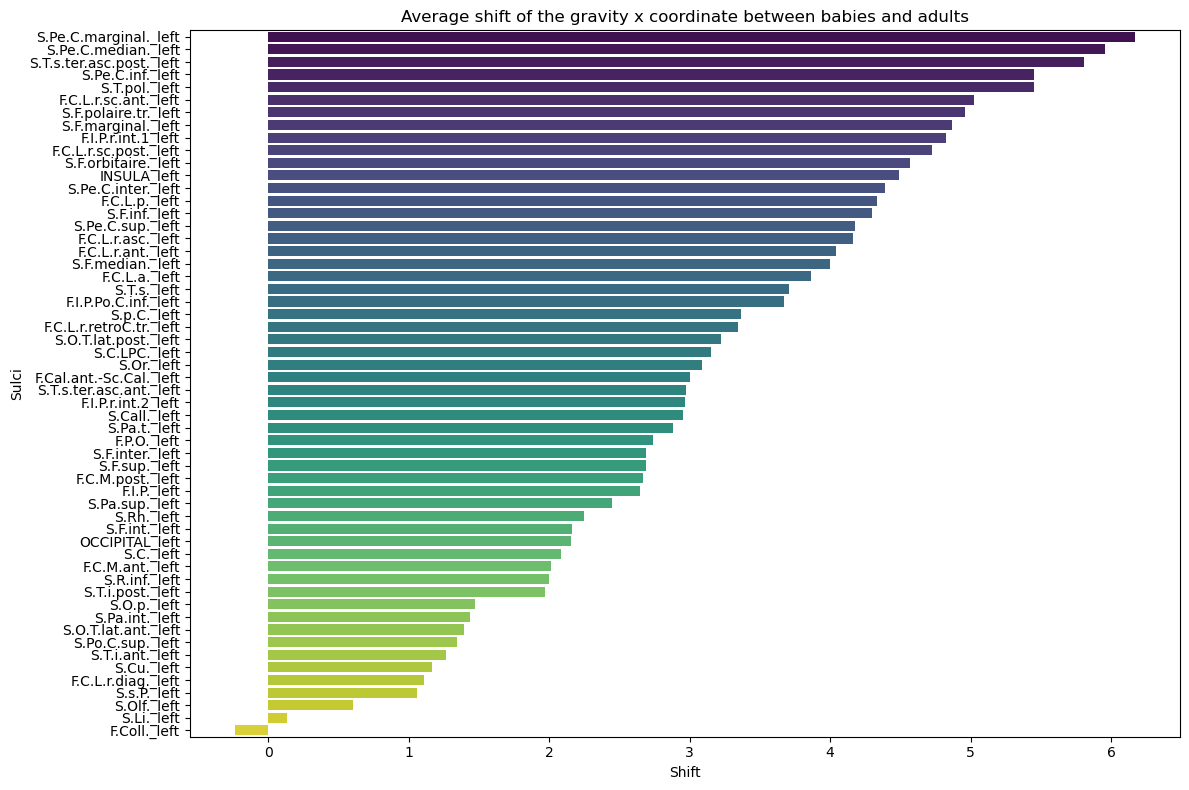

In [96]:
df_all_shifts_sorted = pd.read_csv("/neurospin/dico/rmenasria/Runs/03_main/Program/2025_rmenasria_prematurity/notebooks/racim/all_sulci_gravity_center_shifts_quality_check.csv").sort_values(by="shift_x", ascending=False)
df_left_sulci = df_all_shifts_sorted[df_all_shifts_sorted["sulcus"].str.contains("_left")]



plt.figure(figsize=(12, 8))
sns.barplot(data=df_left_sulci, x="shift_x", y="sulcus", palette="viridis")
plt.xlabel("Shift")
plt.ylabel("Sulci")
plt.title("Average shift of the gravity x coordinate between babies and adults")
plt.tight_layout()
plt.show()

/tmp/ipykernel_19898/2059611754.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_left_sulci, x="shift_y", y="sulcus", palette="viridis")


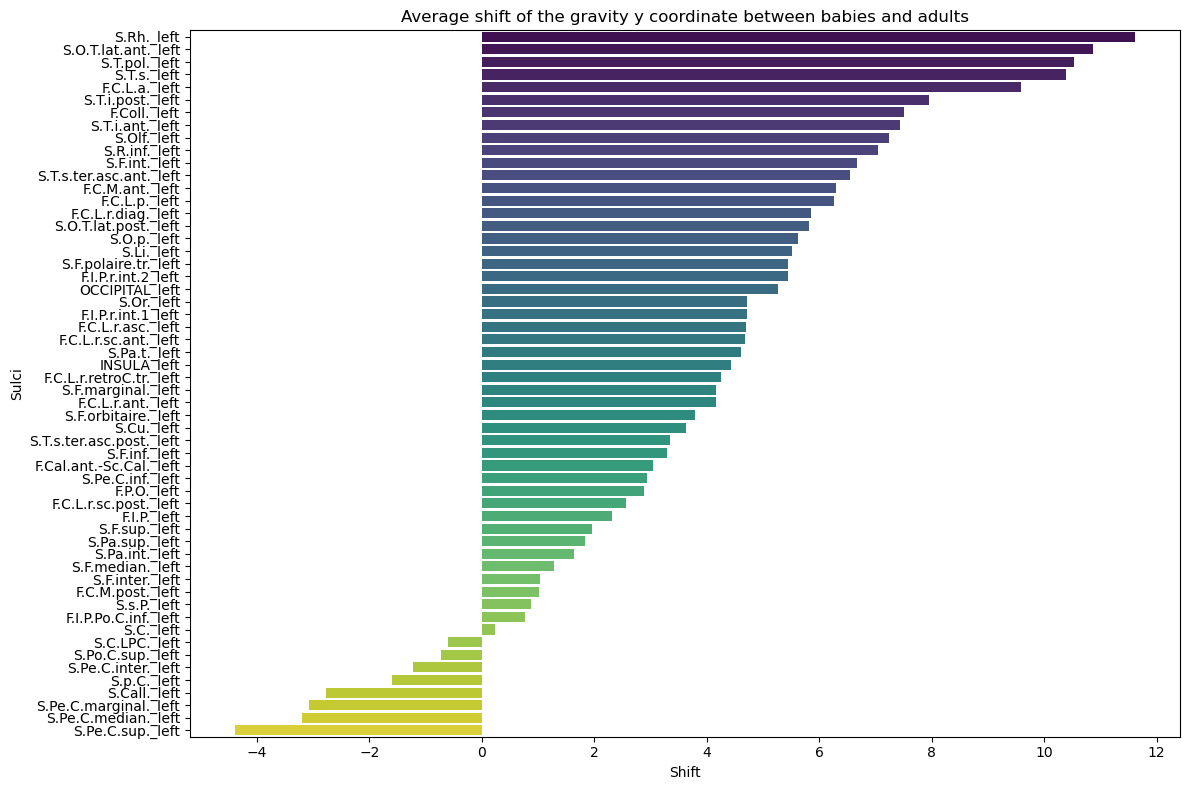

In [99]:
df_all_shifts_sorted = pd.read_csv("/neurospin/dico/rmenasria/Runs/03_main/Program/2025_rmenasria_prematurity/notebooks/racim/all_sulci_gravity_center_shifts_quality_check.csv").sort_values(by="shift_y", ascending=False)
df_left_sulci = df_all_shifts_sorted[df_all_shifts_sorted["sulcus"].str.contains("_left")]


plt.figure(figsize=(12, 8))
sns.barplot(data=df_left_sulci, x="shift_y", y="sulcus", palette="viridis")
plt.xlabel("Shift")
plt.ylabel("Sulci")
plt.title("Average shift of the gravity y coordinate between babies and adults")
plt.tight_layout()
plt.show()

/tmp/ipykernel_19898/600896856.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_left_sulci, x="shift_z", y="sulcus", palette="viridis")


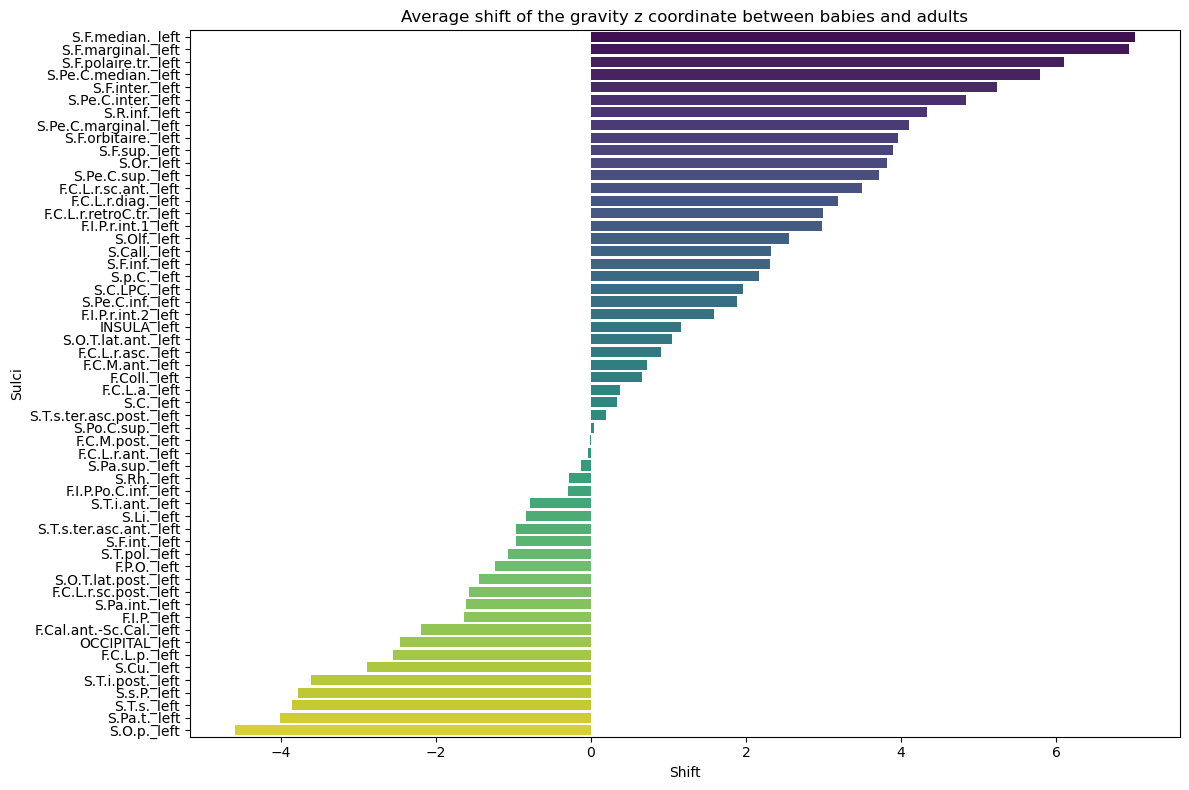

In [100]:
df_all_shifts_sorted = pd.read_csv("/neurospin/dico/rmenasria/Runs/03_main/Program/2025_rmenasria_prematurity/notebooks/racim/all_sulci_gravity_center_shifts_quality_check.csv").sort_values(by="shift_z", ascending=False)
df_left_sulci = df_all_shifts_sorted[df_all_shifts_sorted["sulcus"].str.contains("_left")]

plt.figure(figsize=(12, 8))
sns.barplot(data=df_left_sulci, x="shift_z", y="sulcus", palette="viridis")
plt.xlabel("Shift")
plt.ylabel("Sulci")
plt.title("Average shift of the gravity z coordinate between babies and adults")
plt.tight_layout()
plt.show()